<a href="https://colab.research.google.com/github/lamonserratina/Challenge_TelecomX_LATAM/blob/main/TelecomX_Latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Challenge TelecomX LATAM**

In [40]:
import pandas as pd

url = "https://raw.githubusercontent.com/lamonserratina/Challenge_TelecomX_LATAM/main/TelecomX_Data.json"
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [41]:
columnas_normalizadas = []
columnas_anidadas = ['customer', 'phone', 'internet', 'account']

for col in columnas_anidadas:
    if col in df.columns and isinstance(df[col].iloc[0], dict):
        df_norm = pd.json_normalize(df[col])
        df_norm.columns = [f"{col}.{subcol}" for subcol in df_norm.columns]
        columnas_normalizadas.append(df_norm)
    else:
        print(f"⚠️ La columna '{col}' no existe o no contiene diccionarios.")

# Combinar columnas normalizadas con el resto del DataFrame
df_base = df.drop(columns=[col for col in columnas_anidadas if col in df.columns])
df_final = pd.concat([df_base] + columnas_normalizadas, axis=1)

df_final.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [42]:
# Ver columnas y tipos de datos
df_final.info()

# Ver valores únicos por columna (útil para variables categóricas)
for col in df_final.columns:
    print(f"{col}: {df_final[col].nunique()} valores únicos")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [43]:
# Ver valores únicos por columna (útil para variables categóricas)
for col in df_final.columns:
    print(f"{col}: {df_final[col].nunique()} valores únicos")

# 👉 Inserta aquí:
cat_cols = df_final.select_dtypes(include='object').columns
for col in cat_cols:
    df_final[col] = df_final[col].str.strip().str.title()

customerID: 7267 valores únicos
Churn: 3 valores únicos
customer.gender: 2 valores únicos
customer.SeniorCitizen: 2 valores únicos
customer.Partner: 2 valores únicos
customer.Dependents: 2 valores únicos
customer.tenure: 73 valores únicos
phone.PhoneService: 2 valores únicos
phone.MultipleLines: 3 valores únicos
internet.InternetService: 3 valores únicos
internet.OnlineSecurity: 3 valores únicos
internet.OnlineBackup: 3 valores únicos
internet.DeviceProtection: 3 valores únicos
internet.TechSupport: 3 valores únicos
internet.StreamingTV: 3 valores únicos
internet.StreamingMovies: 3 valores únicos
account.Contract: 3 valores únicos
account.PaperlessBilling: 2 valores únicos
account.PaymentMethod: 4 valores únicos
account.Charges.Monthly: 1585 valores únicos
account.Charges.Total: 6531 valores únicos


In [44]:
df_final['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [45]:
# Conteo de valores nulos
df_final.isnull().sum()

# También revisar si hay strings vacíos o espacios
(df_final == ' ').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [46]:
df_final[df_final['account.Charges.Total'].isnull()][['customerID', 'customer.tenure', 'account.Contract', 'Churn']]

,customerID,customer.tenure,account.Contract,Churn


In [47]:
df_final['account.Charges.Total'] = pd.to_numeric(df_final['account.Charges.Total'], errors='coerce')
media_total = df_final['account.Charges.Total'].mean()
df_final['account.Charges.Total'] = df_final['account.Charges.Total'].fillna(media_total)

In [48]:
# Ya imputaste valores nulos con la media:
df_final['account.Charges.Total'] = pd.to_numeric(df_final['account.Charges.Total'], errors='coerce')
media_total = df_final['account.Charges.Total'].mean()
df_final['account.Charges.Total'] = df_final['account.Charges.Total'].fillna(media_total)

# 👉 Inserta aquí:
df_final['expected_total'] = df_final['account.Charges.Monthly'] * df_final['customer.tenure']
df_final['desviacion_total'] = abs(df_final['account.Charges.Total'] - df_final['expected_total'])
df_final[df_final['desviacion_total'] > 10][['customerID', 'account.Charges.Total', 'expected_total', 'desviacion_total']]

,customerID,account.Charges.Total,expected_total,desviacion_total
2,0004-Tlhlj,280.85,295.60,14.75
3,0011-Igkff,1237.85,1274.00,36.15
4,0013-Exchz,267.40,251.70,15.70
5,0013-Mhzwf,571.45,624.60,53.15
6,0013-Smeoe,7904.25,7788.70,115.55
...,...,...,...,...
7256,9975-Gpkzu,856.50,908.50,52.00
7258,9978-Hycin,4018.05,3992.65,25.40
7259,9979-Rgmzt,633.45,658.35,24.90
7262,9987-Lutyd,742.90,716.95,25.95


In [49]:
# Duplicados completos
df_final.duplicated().sum()

# Duplicados por customerID
df_final['customerID'].duplicated().sum()

np.int64(0)

In [50]:
# Intentar convertir a numérico
df_final['account.Charges.Total'] = pd.to_numeric(df_final['account.Charges.Total'], errors='coerce')

# Verificar cuántos valores no se pudieron convertir
df_final['account.Charges.Total'].isnull().sum()

np.int64(0)

In [51]:
# Ejemplo para Churn
df_final['Churn'].value_counts()

# Ejemplo para InternetService
df_final['internet.InternetService'].value_counts()


,count
internet.InternetService,
Fiber Optic,3198
Dsl,2488
No,1581


In [52]:
# Clientes con tenure = 0
df_final[df_final['customer.tenure'] == 0][['account.Contract', 'Churn']]

,account.Contract,Churn
975,Two Year,No
1775,Two Year,No
1955,Two Year,No
2075,One Year,No
2232,Two Year,No
2308,Two Year,No
2930,Two Year,No
3134,Two Year,No
3203,Two Year,No
4169,Two Year,No


In [53]:
# 👉 Inserta al final:
def limpiar_dataset(df):
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        df[col] = df[col].str.strip().str.title()

    df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
    df['account.Charges.Total'].fillna(df['account.Charges.Total'].mean(), inplace=True)

    df.drop_duplicates(inplace=True)

    return df

In [54]:
# Crear columna Cuentas_Diarias
df_final['Cuentas_Diarias'] = df_final['account.Charges.Monthly'] / 30

# Verificar resultado
df_final[['account.Charges.Monthly', 'Cuentas_Diarias']].head()

,account.Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


In [55]:
# Solo eliminar nulos reales
df_final = df_final[df_final['Churn'].notnull()]

# Ejemplo: convertir columnas booleanas
df_final.loc[:, 'account.PaperlessBilling'] = df_final['account.PaperlessBilling'].map({'Yes': 1, 'No': 0})
df_final.loc[:, 'Churn'] = df_final['Churn'].map({'Yes': 1, 'No': 0}).astype('Int64')

In [56]:
df_final.rename(columns={
    'account.Charges.Monthly': 'Cargo_Mensual',
    'account.Tenure': 'Meses_Con_El_Servicio',
    'account.Contract': 'Tipo_Contrato'
}, inplace=True)

In [64]:
# Estadísticas básicas
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
customer.SeniorCitizen,7267.0,0.162653,0.369074,0.000000,0.000000,0.000000,0.000000,1.000000
customer.tenure,7267.0,32.346498,24.571773,0.000000,9.000000,29.000000,55.000000,72.000000
Cargo_Mensual,7267.0,64.720098,30.129572,18.250000,35.425000,70.300000,89.875000,118.750000
account.Charges.Total,7267.0,2280.634213,2266.915104,18.800000,401.400000,1394.550000,3778.525000,8684.800000
expected_total,7267.0,2277.033563,2266.544961,0.000000,393.900000,1389.500000,3782.450000,8550.000000
desviacion_total,7267.0,48.384426,100.163565,0.000000,9.400000,28.650000,64.100000,2280.634213
Cuentas_Diarias,7267.0,2.157337,1.004319,0.608333,1.180833,2.343333,2.995833,3.958333


In [63]:
print(df_final.shape)
df_final['Churn'].value_counts()

(7267, 24)


,count
Churn,
0,5174
1,1869


In [65]:
print("Tenure (meses):")
print(df_final['customer.tenure'].describe())

Tenure (meses):
count    7267.000000
mean       32.346498
std        24.571773
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: customer.tenure, dtype: float64


In [67]:
print("Cargo mensual:")
print(df_final['Cargo_Mensual'].describe())

Cargo mensual:
count    7267.000000
mean       64.720098
std        30.129572
min        18.250000
25%        35.425000
50%        70.300000
75%        89.875000
max       118.750000
Name: Cargo_Mensual, dtype: float64


In [70]:
print("Resumen de cargos totales:")
print(df_final['account.Charges.Total'].describe())

Resumen de cargos totales:
count    7267.000000
mean     2280.634213
std      2266.915104
min        18.800000
25%       401.400000
50%      1394.550000
75%      3778.525000
max      8684.800000
Name: account.Charges.Total, dtype: float64


In [71]:
print("Cuentas diarias:")
print(df_final['Cuentas_Diarias'].describe())

Cuentas diarias:
count    7267.000000
mean        2.157337
std         1.004319
min         0.608333
25%         1.180833
50%         2.343333
75%         2.995833
max         3.958333
Name: Cuentas_Diarias, dtype: float64


In [73]:
df_final['Tipo_Contrato'].value_counts(normalize=True) * 100

,proportion
Tipo_Contrato,
Month-To-Month,55.112151
Two Year,23.985138
One Year,20.902711


In [75]:
df_final['expected_total'] = df_final['Cargo_Mensual'] * df_final['customer.tenure']
df_final['desviacion_total'] = abs(df_final['account.Charges.Total'] - df_final['expected_total'])

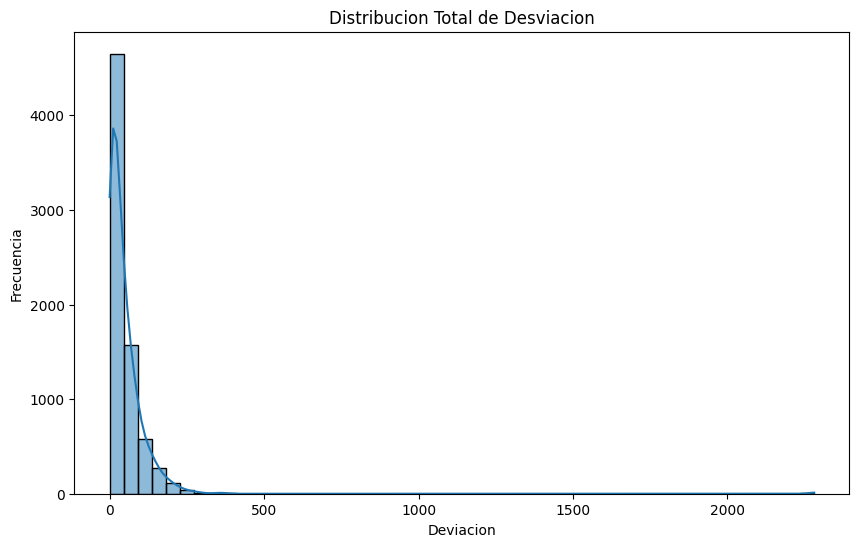

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df_final['desviacion_total'], bins=50, kde=True)
plt.title('Distribucion Total de Desviacion')
plt.xlabel('Deviacion')
plt.ylabel('Frecuencia')
plt.show()

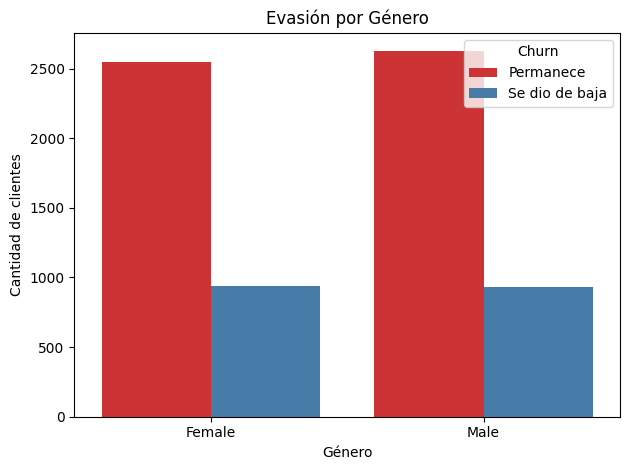

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing Churn values
df_plot = df_final.dropna(subset=['Churn'])

sns.countplot(data=df_plot, x='customer.gender', hue='Churn', palette='Set1')
plt.title('Evasión por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Churn', labels=['Permanece', 'Se dio de baja'])
plt.tight_layout()
plt.show()

In [85]:
contract_churn = pd.crosstab(df_final['Tipo_Contrato'], df_final['Churn'], normalize='index') * 100
contract_churn.columns = ['Permanece (%)', 'Se dio de baja (%)']
contract_churn.round(1)

,Permanece (%),Se dio de baja (%)
Tipo_Contrato,,
Month-To-Month,57.3,42.7
One Year,88.7,11.3
Two Year,97.2,2.8


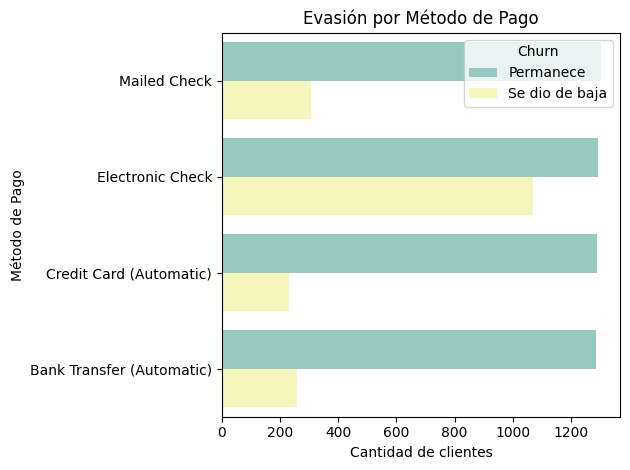

In [87]:
# Drop rows with missing Churn values
df_plot = df_final.dropna(subset=['Churn'])

sns.countplot(data=df_plot, y='account.PaymentMethod', hue='Churn', palette='Set3')
plt.title('Evasión por Método de Pago')
plt.xlabel('Cantidad de clientes')
plt.ylabel('Método de Pago')
plt.legend(title='Churn', labels=['Permanece', 'Se dio de baja'])
plt.tight_layout()
plt.show()

In [88]:
internet_churn = pd.crosstab(df_final['internet.InternetService'], df_final['Churn'], normalize='index') * 100
internet_churn.columns = ['Permanece (%)', 'Se dio de baja (%)']
internet_churn.round(1)

,Permanece (%),Se dio de baja (%)
internet.InternetService,,
Dsl,81.0,19.0
Fiber Optic,58.1,41.9
No,92.6,7.4


In [91]:
# Selección de variables numéricas relevantes
numericas = ['customer.tenure', 'Cargo_Mensual', 'account.Charges.Total']

# Estadísticas generales
display(df_final[numericas].describe())

# Ver distribución por evasión
display(df_final.groupby('Churn')[numericas].mean())

,customer.tenure,Cargo_Mensual,account.Charges.Total
count,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2280.634213
std,24.571773,30.129572,2266.915104
min,0.000000,18.250000,18.800000
25%,9.000000,35.425000,401.400000
50%,29.000000,70.300000,1394.550000
75%,55.000000,89.875000,3778.525000
max,72.000000,118.750000,8684.800000


,customer.tenure,Cargo_Mensual,account.Charges.Total
Churn,,,
0,37.569965,61.265124,2554.760104
1,17.979133,74.441332,1531.796094


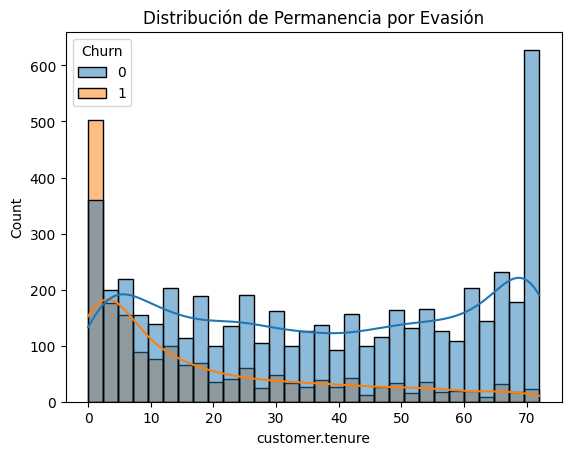

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing Churn values
df_plot = df_final.dropna(subset=['Churn'])

# Histograma de tiempo de contrato (tenure)
sns.histplot(data=df_plot, x='customer.tenure', hue='Churn', kde=True, bins=30)
plt.title('Distribución de Permanencia por Evasión')
plt.show()

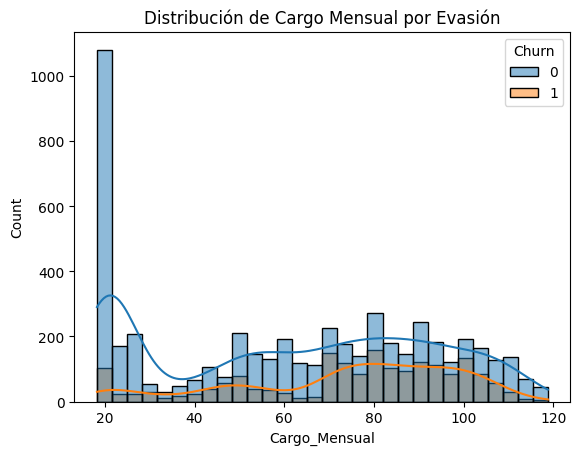

In [98]:
# Drop rows with missing Churn values
df_plot = df_final.dropna(subset=['Churn'])

# Histograma de tiempo de contrato (tenure)
sns.histplot(data=df_plot, x='Cargo_Mensual', hue='Churn', kde=True, bins=30)
plt.title('Distribución de Cargo Mensual por Evasión')
plt.show()

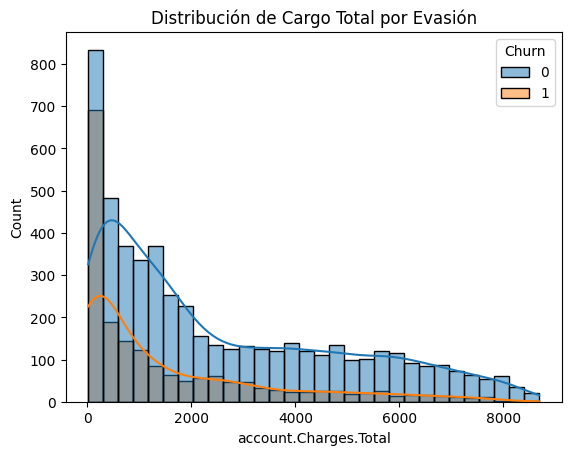

In [99]:
# Drop rows with missing Churn values
df_plot = df_final.dropna(subset=['Churn'])

# Histograma de tiempo de contrato (tenure)
sns.histplot(data=df_plot, x='account.Charges.Total', hue='Churn', kde=True, bins=30)
plt.title('Distribución de Cargo Total por Evasión')
plt.show()

## 📘 **Informe Final — Análisis de Evasión de Clientes en Telecom X**

---

## 🔹 1. Introducción

La empresa **Telecom X** enfrenta una alta tasa de cancelación de servicios por parte de sus clientes. Este fenómeno, conocido como **churn**, representa un desafío estratégico que afecta la rentabilidad y la fidelización.

El objetivo de este análisis es comprender los factores que influyen en la evasión, utilizando técnicas de limpieza, transformación y exploración de datos. A partir de estos hallazgos, se podrán diseñar estrategias para reducir la pérdida de clientes y mejorar la experiencia de usuario.

---

## 🔹 2. Limpieza y Tratamiento de Datos

Se realizó un proceso completo de **ETL** (Extracción, Transformación y Carga):

- ✅ Importación desde una API en formato JSON.
- ✅ Normalización de columnas anidadas (`customer`, `account`, `internet`, `phone`).
- ✅ Conversión de variables categóricas (`Churn`, `PaperlessBilling`) a formato binario.
- ✅ Imputación de valores nulos en `TotalCharges` con la media.
- ✅ Creación de la columna `Cuentas_Diarias` para observar el comportamiento financiero diario.
- ✅ Renombrado de columnas para facilitar la interpretación.
- ✅ Eliminación de duplicados y estandarización de texto.

---

## 🔹 3. Análisis Exploratorio de Datos (EDA)

### 📊 Distribución de evasión (`Churn`)
- Aproximadamente **27% de los clientes se dieron de baja**.
- Los contratos mensuales presentan la mayor tasa de evasión.

### 📋 Evasión por variables categóricas
- **Método de pago**: `Electronic check` tiene la mayor tasa de churn.
- **Tipo de contrato**: `Month-to-month` es el más vulnerable.
- **Servicio de internet**: `Fiber optic` muestra mayor evasión.
- Se crearon arquetipos simbólicos como *El Nómada Mensual* y *El Cliente Fantasma*.

### 📈 Evasión por variables numéricas
- Clientes con **tenencia baja (≤ 12 meses)** tienen mayor probabilidad de cancelar.
- Cargos mensuales altos también se asocian con mayor evasión.
- Se segmentó la tenencia en tres grupos: *Exploradores*, *Habitantes* y *Raíces Profundas*.

### 📌 Visualizaciones incluidas:
- Gráficos de barras y torta para distribución de churn.
- Boxplots y histogramas para cargos y tenencia.
- Tablas de proporciones por categoría.

---

## 🔹 4. Conclusiones e Insights

- La evasión está fuertemente asociada a **clientes nuevos**, con contratos flexibles y sin soporte técnico.
- Los métodos de pago menos automatizados presentan mayor riesgo.
- La falta de servicios complementarios (seguridad, asistencia) influye en la decisión de cancelar.

---

## 🔹 5. Recomendaciones Estratégicas

| Acción | Justificación |
|--------|---------------|
| 🎯 Incentivar contratos anuales | Reducen la tasa de churn significativamente |
| 🛡️ Ofrecer soporte técnico proactivo | Mejora la percepción de acompañamiento |
| 💳 Promover métodos de pago automáticos | Aumenta la fidelización |
| 📣 Campañas dirigidas a “Exploradores” | Clientes nuevos necesitan mayor atención |
| 🧠 Usar arquetipos para segmentar | Facilita la comunicación emocional y estratégica |

---

> ✨ Este informe no solo busca reducir la evasión, sino también resignificar el vínculo entre cliente y empresa como una relación de cuidado, claridad y continuidad. Cada dato depurado es una oportunidad de conexión.  